In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from numpy import random
from influencer_games.adaptive_dynamics.visualization import Shell
from influencer_games.utils.utilities import *
from influencer_games.domains.resource_distributions import*

## Resource distribution (Gaussian mixture)

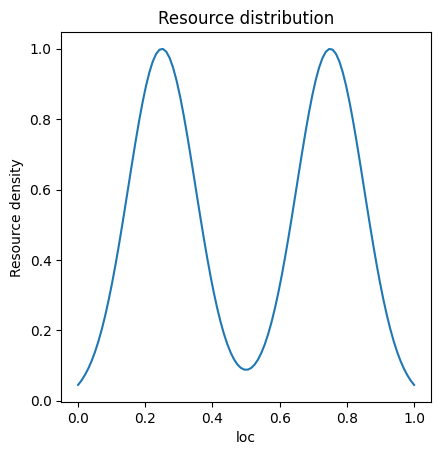

In [2]:
#The resource points
bin_points=np.linspace(.001, .999, 100)
 
#Resource parameters
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#Resource distribution
resource_distribution2=resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

#Plot
domain=bin_points
fig, ax = plt.subplots()
ax.plot(domain,resource_distribution2)
plt.title('Resource distribution')
plt.xlabel('loc')
plt.ylabel('Resource density')
ax.set_box_aspect(1) 
#fig.savefig('1d_bimodal_alpha_05.svg',bbox_inches='tight')
plt.show()


## Setup:The enviroment and adapative enviroment

The cell below sets up the outer shell for visualizing the the adapative enviroment. 

In [49]:
domain_type='1d'
resource_distribution=resource_distribution2
mean=np.dot(bin_points,resource_distribution)/np.sum(resource_distribution) #mean of the resource distribution

num_agents=2#number of agents
int_agents_pos=player_postion_setup(num_agents=num_agents,setup_type='intial_symmetric_setup',domain_type=domain_type,domain_bounds=0)

infl_configs={"infl_type":"gaussian"} # infleunce type of the agents

parameters=player_parameter_setup(num_agents=num_agents,infl_type=infl_configs["infl_type"],setup_type="intial_symmetric_setup",reach=.1) # parmameters impacting agents reach (their std)
#parameters_custom=np.array([[.1,.2,.3,...]]) #needs to be length num_players

lr_type='cosine'
learning_rate=[1/10000,1/10000,500] # learning rate parameters 
#lr_type='static'
#learning_rate=1/1000
time_steps=1000 # number steps for the adaptive dyanamics



vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos.copy(), parameters=parameters,resource_distribution=resource_distribution,bin_points=bin_points,mean=mean,infl_configs=infl_configs,lr_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type=domain_type,infl_fshift=True,Q=5)

In [50]:
vis.setup_adaptive_env()
vis.field.gradient_accent()
og_pos_matrix=vis.field.pos_matrix
og_grad_matrix=vis.field.grad_matrix
vis.agents_pos=int_agents_pos.copy()
vis.field.agents_pos=int_agents_pos.copy()

broke


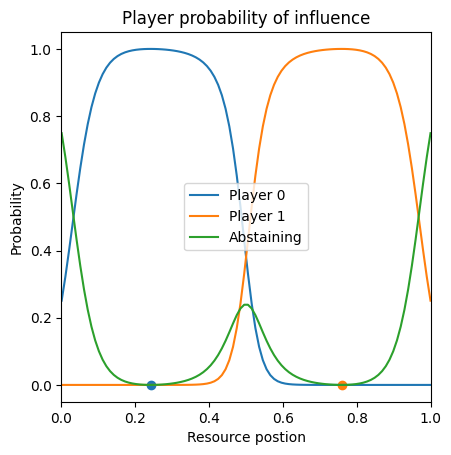

In [52]:
vis.prob_plot(postion=vis.field.pos_matrix[-1].numpy(),voting_configs={"TYPE":"abstaing"})

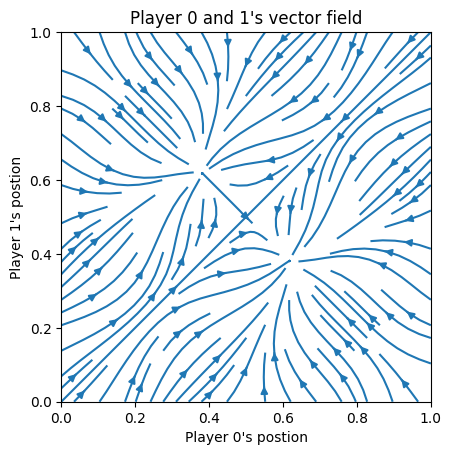

In [39]:
vis.vect_plot(agent_id=0,parameter_instance=vis.field.parameters)

## End State plot

Shows the players influence over the resource distribution as they move via adaptive dynamics

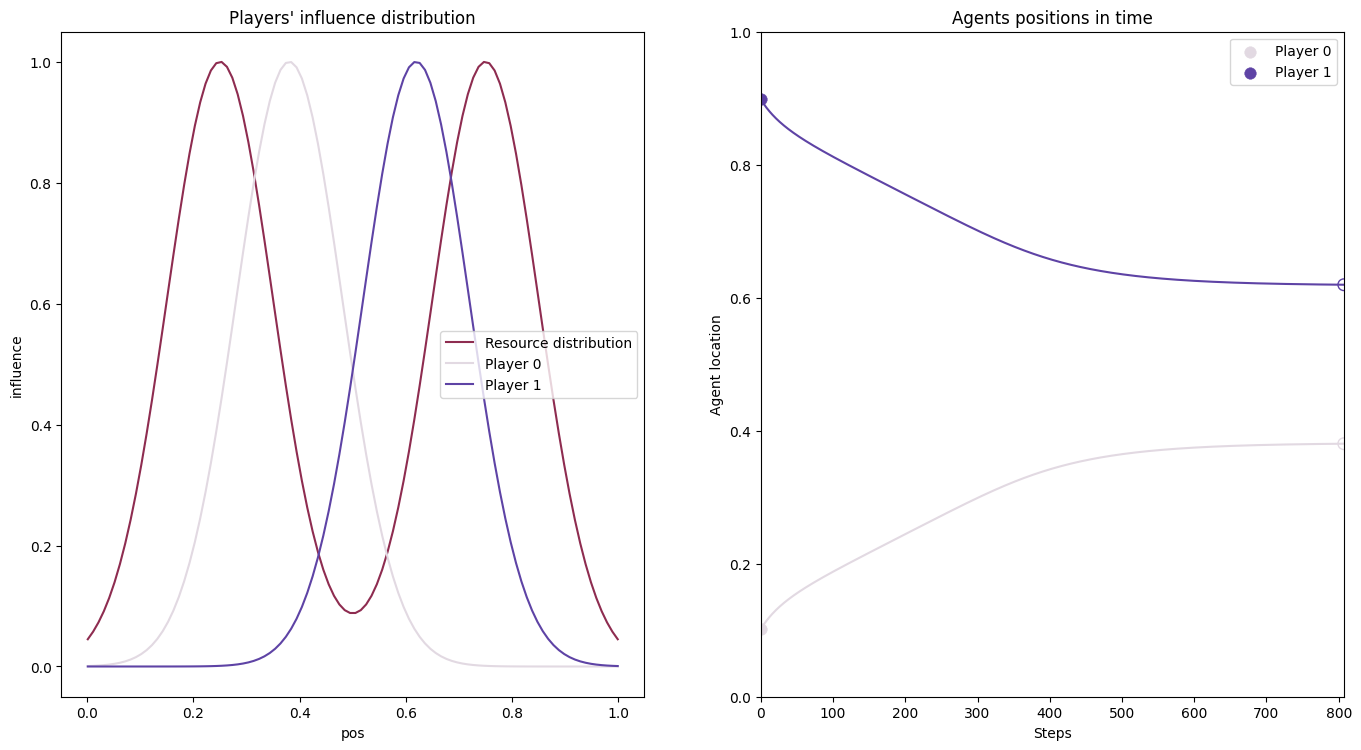

In [40]:
vis.dist_pos_gif(1)

## Gif State plot

gif of the above plot

In [41]:
#vis.dist_pos_gif(100)

## Gradient Plot
Plots the agents gradient as they move using adaptive dynamics

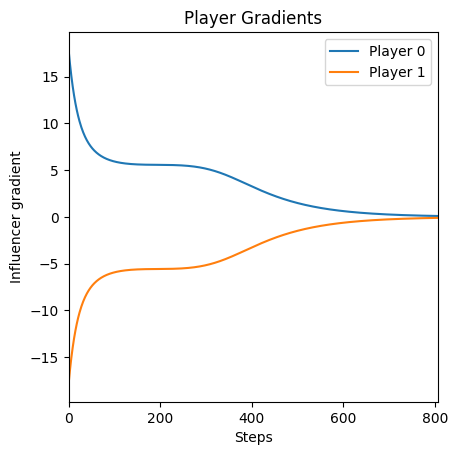

In [42]:
vis.grad_plot()

## Gradient vector plot for 2 agents (this is a face of the gradient vector space)

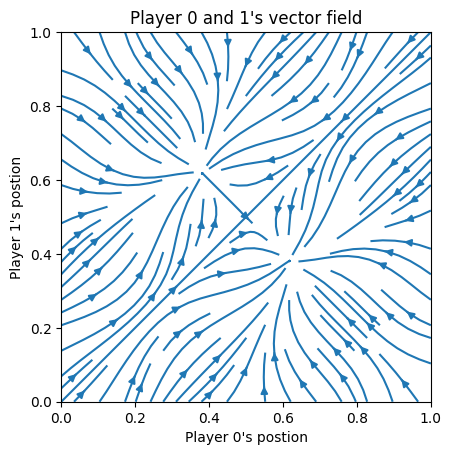

In [43]:
vis.vect_plot(agent_id=0,parameter_instance=vis.parameters,density=1.5)

## Stability plot using the Jacobian (Long run time so try to run less)
Shows the region for stability given different seperation variables $\alpha$

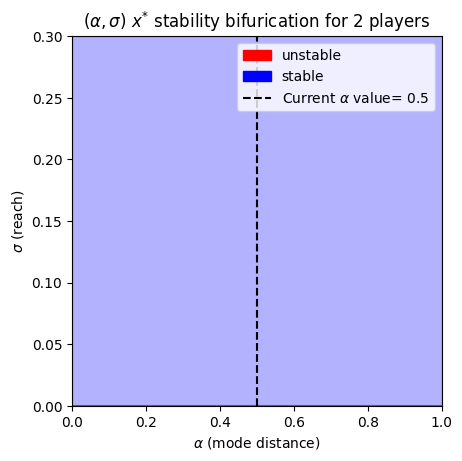

In [16]:
#vis.mean_stability_birfurcation_rs(r_st=.1,r_end=.5,r_points=200,s_st=0,s_end=1,s_points=100)

fig=vis.first_order_bifurication_plot(vis.parameters,resource_distribution_type="multi_modal_gaussian_distribution_1D",alpha_current=.5,alpha_st=0,alpha_end = 1, varying_paramter_type='mean',
                                        fixed_parameters_lst=[resource_parameters_gaussian[0],resource_parameters_gaussian[2]],name_ads=[],title_ads=[])
fig

## Equalibirium bifirications as we cahnge the reach parameters ($\alpha$=0.5)

broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke


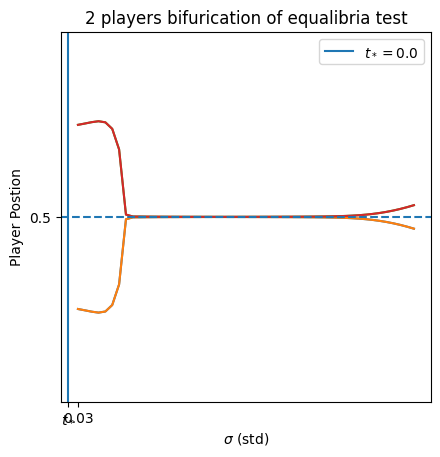

In [53]:
fig=vis.equalibirum_bifurcation_plot(reach_end=.03,reach_start=1,reach_num_points=50,num_interations=2000,intitial_pos=vis.agents_pos,name_ads=['test'],title_ads=['test'],refinements=10)
vis.field.pos_matrix=og_pos_matrix
vis.field.grad_matrix=og_grad_matrix
fig